In [8]:
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1
    
compute_output([-1,0.9,0.9],[1,0,1])

-1

In [11]:

print(compute_output([0.9, -0.6, -0.5], [1.0, -1.0, -1.0]))
print(compute_output([0.9, -0.6, -0.5], [1.0, -1.0, 1.0]))
print(compute_output([0.9, -0.6, -0.5], [1.0, 1.0, -1.0]))
print(compute_output([0.9, -0.6, -0.5], [1.0, 1.0, 1.0]))


1
1
1
-1


w0 =  0.20 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


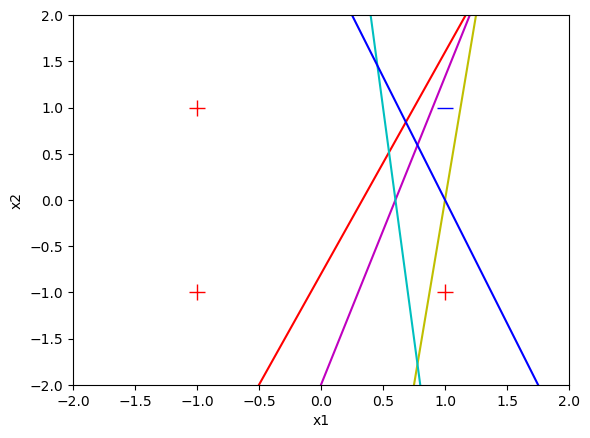

In [12]:
import matplotlib.pyplot as plt
import random

# Define variables needed for plotting.
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
                 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
             -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
             -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
        color_index += 1

# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order

# Define training examples.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # Inputs
y_train = [1.0, 1.0, 1.0, -1.0] # Output (ground truth)

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some "random" numbers

# Print initial weights.
show_learning(w)

# First element in vector x must be 1.
# Length of w and x must be n+1 for neuron with n inputs.
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1

# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function
        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights

plt.show()
